<b><h1>Data Visualization</h1></b>

<b>With Matplotlib</b></br>
Foundational low-level plotting library widely used for creating static, animated and interactive visualizations. Works well with NumPy arrays and Pandas DataFrames.

It is used to graphically represent data, facilitating easier analysis and understanding.

<b>With Seaborn</b></br>
A high-level interface for creating statistical graphics. It is built on top of Matplotlib and provides a simpler, more intuitive interface for creating common statistical plots.

In [23]:
#Import necessary libraries
import matplotlib.pyplot as plt #for basic plots
import pandas as pd #library for data manipulation
import numpy as np #library for numerical calculations

In [24]:
# #Option 1 - Loading files from google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
#Load the dataset
carsales = pd.read_csv('../data/Car_Sales.csv')

In [26]:
# # Option 2 - uploading a file from local computer storage
# ''' from google.colab import files
# uploaded = files.upload()
# Housing = pd.read_csv('carsales.csv') # Load file '''

In [27]:
#displays the first 5 rows of the dataset.
print(carsales.head(5))


   Car_ID   Make    Model  Year  Price ($)  Mileage (km) Fuel Type  \
0    1001  Mazda   Mazda3  2013    32935.2        105354    Petrol   
1    1002    Kia  Sorento  2015    23799.4         94113    Petrol   
2    1003   Ford    Focus  2023    21786.0      91180000    Diesel   
3    1004  Mazda     CX-5  2023    36836.8         40731    Diesel   
4    1005  Mazda     CX-5  2016    34722.6         68542  Electric   

  Transmission Owner History Sold (Yes/No)  
0       Manual   First Owner            No  
1    Automatic  Second Owner            No  
2       Manual   First Owner            No  
3    Automatic   First Owner           Yes  
4       Manual   Third Owner           Yes  


In [28]:
#Checking the data types of the data
print(carsales.dtypes)

Car_ID             int64
Make              object
Model             object
Year               int64
Price ($)        float64
Mileage (km)       int64
Fuel Type         object
Transmission      object
Owner History     object
Sold (Yes/No)     object
dtype: object


In [29]:
carsales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         233 non-null    int64  
 1   Make           233 non-null    object 
 2   Model          233 non-null    object 
 3   Year           233 non-null    int64  
 4   Price ($)      229 non-null    float64
 5   Mileage (km)   233 non-null    int64  
 6   Fuel Type      233 non-null    object 
 7   Transmission   233 non-null    object 
 8   Owner History  233 non-null    object 
 9   Sold (Yes/No)  233 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 18.3+ KB


In [30]:
#display the total of null values in each column
print(carsales.isnull().sum())


Car_ID           0
Make             0
Model            0
Year             0
Price ($)        4
Mileage (km)     0
Fuel Type        0
Transmission     0
Owner History    0
Sold (Yes/No)    0
dtype: int64


In [31]:
#calculate percentage of nulls per column. if <5% minimal impact on dataset , >5%-20%, or  >20%impacts significantly on dataset(too much data loss)
print(carsales.isnull().sum()/len(carsales)*100)

Car_ID           0.000000
Make             0.000000
Model            0.000000
Year             0.000000
Price ($)        1.716738
Mileage (km)     0.000000
Fuel Type        0.000000
Transmission     0.000000
Owner History    0.000000
Sold (Yes/No)    0.000000
dtype: float64


In [32]:
#drop null values
carsales.dropna(inplace=True)
carsales.isnull().sum()

Car_ID           0
Make             0
Model            0
Year             0
Price ($)        0
Mileage (km)     0
Fuel Type        0
Transmission     0
Owner History    0
Sold (Yes/No)    0
dtype: int64

**Bar Plots** -
Best for comparing categorical data

In [33]:
#Count cars by make
count_make = carsales["Make"].value_counts() # total of each make in the column
print(count_make)

Make
Hyundai     34
BMW         33
Mazda       29
Nissan      24
Mercedes    23
Toyota      23
Audi        20
Ford        17
Kia         16
Honda       10
Name: count, dtype: int64


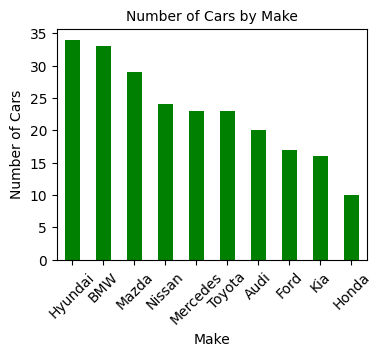

In [34]:
#Basic bar plot
plt.figure(figsize=(4,3))
count_make.plot(kind='bar', color='green')
plt.title('Number of Cars by Make', fontsize=10)
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.ylabel('Number of Cars')
plt.show()

In [35]:
#Make a basic bar plot with Seaborn Plot


Fuel Type
Diesel      30017.915556
Electric    30662.928947
Hybrid      29320.619231
Petrol      31849.192857
Name: Price ($), dtype: float64


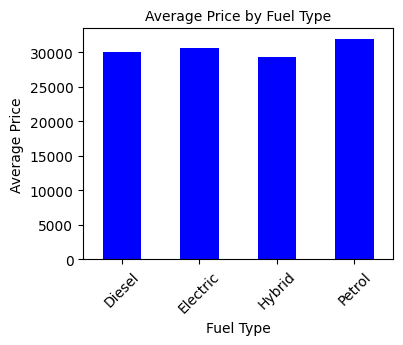

In [36]:
#Average Price by Fuel Type
avg_price_fuel = carsales.groupby('Fuel Type')['Price ($)'].mean()
print(avg_price_fuel)
plt.figure(figsize=(4,3))
avg_price_fuel.plot(kind='bar', color='blue')
plt.title('Average Price by Fuel Type', fontsize=10)
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.show()

Make
Hyundai     36563.788235
BMW         31576.151515
Mazda       31091.020690
Nissan      30892.650000
Ford        30456.305882
Audi        29728.870000
Toyota      29304.869565
Mercedes    26537.008696
Honda       25633.260000
Kia         25508.775000
Name: Price ($), dtype: float64


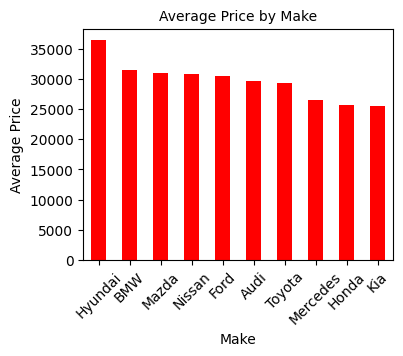

In [37]:
#Average price by make
avg_price_make = carsales.groupby('Make')['Price ($)'].mean().sort_values(ascending=False) # sorts values from largest to smallest
print(avg_price_make)
plt.figure(figsize=(4,3))
avg_price_make.plot(kind='bar', color='red')
plt.title('Average Price by Make', fontsize=10)
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.show()

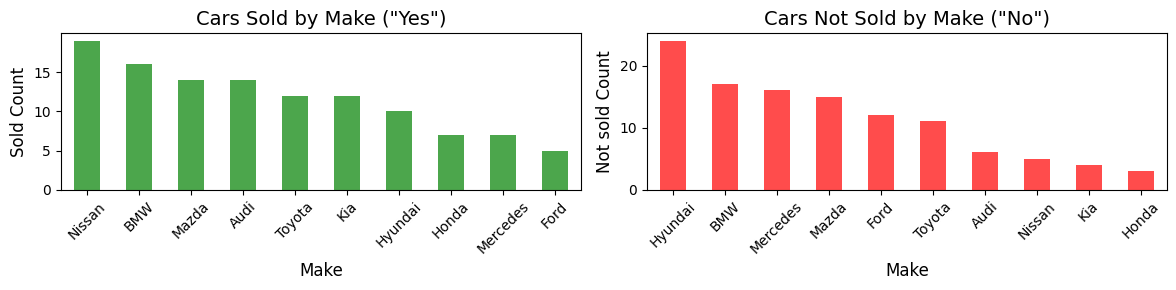

In [38]:
# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))

# --- Subplot 1: Cars Sold ("Yes") ---
sold_cars = carsales[carsales['Sold (Yes/No)'] == 'Yes']['Make'].value_counts()
sold_cars.plot(kind='bar', ax=ax1, color='green', alpha=0.7)
ax1.set_title('Cars Sold by Make ("Yes")', fontsize=14)
ax1.set_xlabel('Make', fontsize=12)
ax1.set_ylabel('Sold Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# --- Subplot 2: Cars Not Sold ("No") ---
Notsold_cars = carsales[carsales['Sold (Yes/No)'] == 'No']['Make'].value_counts()
Notsold_cars.plot(kind='bar', ax=ax2, color='red', alpha=0.7)
ax2.set_title('Cars Not Sold by Make ("No")', fontsize=14)
ax2.set_xlabel('Make', fontsize=12)
ax2.set_ylabel('Not sold Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Line Plot** - ideal for showing trends over time.

In [39]:
#Average price by year of manufacturing
avg_price_year = carsales.groupby('Year')['Price ($)'].mean().sort_index() # calculates average price per year and sorts the years in ascending order for the line plot
print(avg_price_year)

Year
2010    29528.058333
2011    31462.562500
2012    32748.950000
2013    29328.142857
2014    27199.442105
2015    32401.744444
2016    32437.167742
2017    25279.436364
2018    23571.355556
2019    32029.800000
2020    28612.213333
2021    42310.885714
2022    30951.525000
2023    30330.244444
Name: Price ($), dtype: float64


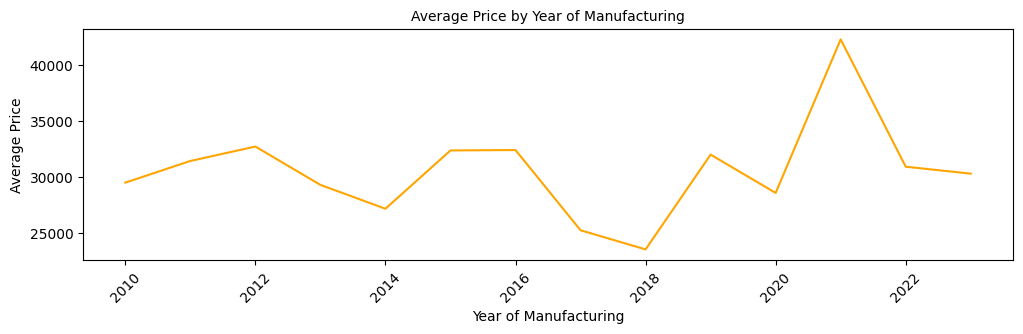

In [53]:
#Line plot
plt.figure(figsize=(12,3))
avg_price_year.plot(kind='line', color='orange')
plt.title('Average Price by Year of Manufacturing', fontsize=10)
plt.xlabel('Year of Manufacturing')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.show()

In [41]:
#Make a Line Plot with Seaborn


**Histogram** - Histograms visualize the distribution of a continuous variable. In a histogram, the data is divided into bins and the height of each bin represents the frequency or count of data points within that bin.

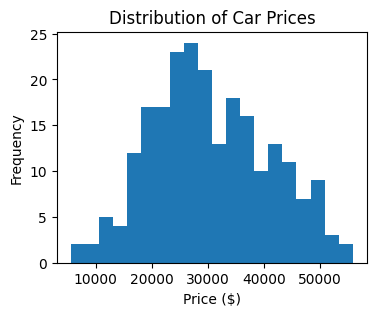

In [42]:
#Distribution of Car prices
plt.figure(figsize=(4,3))
plt.hist(carsales["Price ($)"], bins=20)
plt.title("Distribution of Car Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


In [43]:
#Make a Histogram Plot with Seaborn


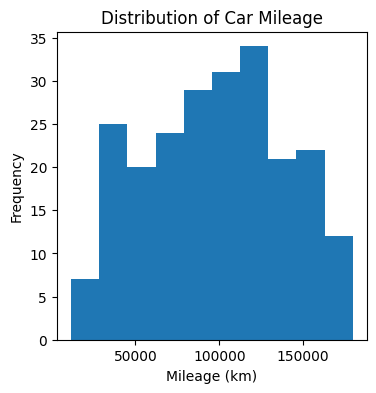

In [55]:
#Distribution of Car Mileage
Price_Mile_Filter = carsales[carsales["Mileage (km)"] < 500_000] # filtering the outliers
plt.figure(figsize=(4,4))
plt.hist(Price_Mile_Filter["Mileage (km)"], bins=10)
plt.title("Distribution of Car Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Frequency")
plt.show()

**Scatter Plot** - shows relationships between two numerical variables.
Best for continuous numerical data.

Positive Correlation - as X increases, Y tends to increase

Negative correlation - as X increases, Y tends to decrease

None - no clear correlation between X and Y

ValueError: x and y must be the same size

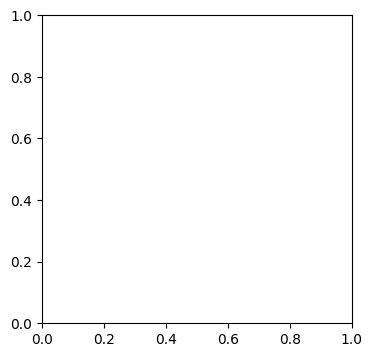

In [ ]:
#Price Vs Mileage
Price_Mile_Filter = carsales[carsales["Mileage (km)"] < 500_000] # filtering the outliers
plt.figure(figsize=(4,4))
plt.scatter(Price_Mile_Filter["Mileage (km)"], Price_Mile_Filter["Price ($)"], alpha = 0.5, color = 'green')
plt.title("Price vs Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Price ($)")
plt.show()

**Box Plot** -  show distribution and outliers of numerical data across categories.It helps visualize the spread/skewness and outliers in a dataset.

Box - interquatile range, IQR (Q1 to Q3)
Line in box - Q2 , median of the data
whiskers - lines extending from the box, indicate max and min values withing the IQR
Outliers - Data points beyond the whiskers are plotted dots.


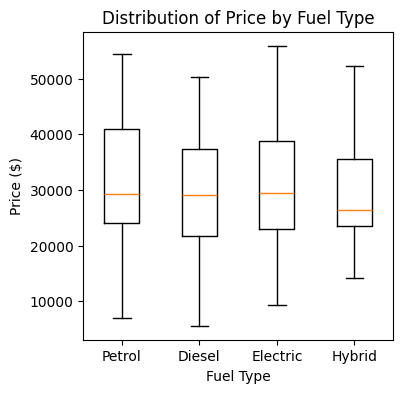

In [46]:
#Price by Fuel Type
plt.figure(figsize=(4, 4))
plt.boxplot([carsales[carsales['Fuel Type'] == ft]['Price ($)'] for ft in carsales['Fuel Type'].unique()],
            tick_labels=carsales['Fuel Type'].unique())
plt.title('Distribution of Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price ($)')
plt.show()

**HeatMap** - visual representation of the correlation matrix between numerical variables in a dataset. It helps you quickly identify how strongly pairs of variables are linearly related.

A value close to 1 indicates a strong positive linear correlation, a value close to -1 indicates a strong negative linear correlation, and a value close to 0 indicates a weak or no linear correlation.

+1.00 - perfect positive linear relationship (both increase together).</br>
-1.00 - perfect negative linear relationship (one increases, the other decreases).</br>
0.00 - no linear relationship.

              Price ($)  Mileage (km)      Year
Price ($)      1.000000     -0.046656  0.027454
Mileage (km)  -0.046656      1.000000 -0.040497
Year           0.027454     -0.040497  1.000000


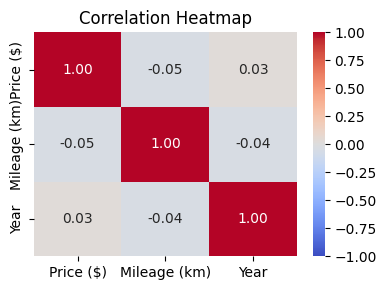

In [47]:
import seaborn as sns
num = carsales[["Price ($)", "Mileage (km)", "Year"]]
corr = num.corr()
print(corr)

plt.figure(figsize=(4, 3))
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Analyzing what Features strongly affect if a car will be sold or not

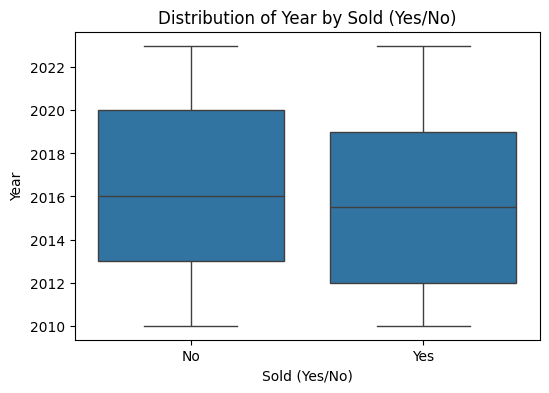

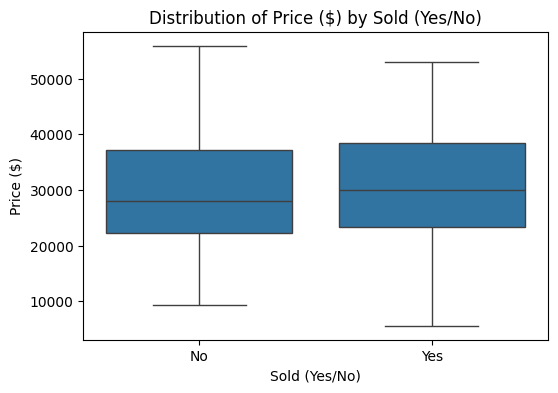

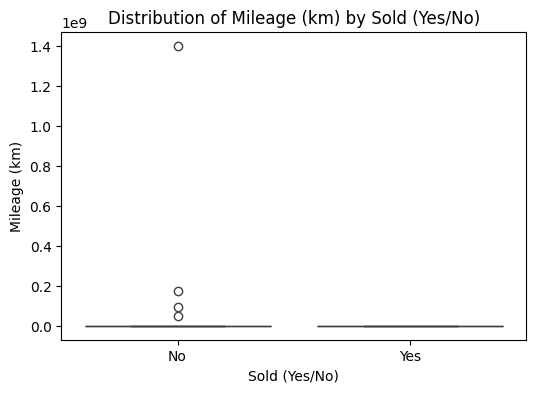

In [48]:
# List of numerical features to plot
numerical_features = ['Year', 'Price ($)', 'Mileage (km)']
target_col = 'Sold (Yes/No)'

# Generate box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target_col, y=feature, data=carsales)
    plt.title(f'Distribution of {feature} by {target_col}')
    plt.xlabel(target_col)
    plt.ylabel(feature)
    plt.show()

In [49]:
# Identify the makes with the highest number of sold cars
top_selling_makes = sold_cars.head(3) # Get the top 3 selling makes
print("Top Selling Makes:")
print(top_selling_makes)

# Identify the makes with the lowest number of sold cars
bottom_selling_makes = sold_cars.tail(3) # Get the bottom 3 selling makes
print("\nBottom Selling Makes:")
print(bottom_selling_makes)

Top Selling Makes:
Make
Nissan    19
BMW       16
Mazda     14
Name: count, dtype: int64

Bottom Selling Makes:
Make
Honda       7
Mercedes    7
Ford        5
Name: count, dtype: int64


In [50]:
# Get the names of the top and bottom selling makes
top_makes_list = top_selling_makes.index.tolist()
bottom_makes_list = bottom_selling_makes.index.tolist()

# Create subsets of the DataFrame for top and bottom selling makes
top_makes_df = carsales[carsales['Make'].isin(top_makes_list)].copy()
bottom_makes_df = carsales[carsales['Make'].isin(bottom_makes_list)].copy()

print("DataFrame for Top Selling Makes:")
display(top_makes_df.head())

print("\nDataFrame for Bottom Selling Makes:")
display(bottom_makes_df.head())

DataFrame for Top Selling Makes:


,Car_ID,Make,Model,Year,Price ($),Mileage (km),Fuel Type,Transmission,Owner History,Sold (Yes/No)
0,1001,Mazda,Mazda3,2013,32935.2,105354,Petrol,Manual,First Owner,No
3,1004,Mazda,CX-5,2023,36836.8,40731,Diesel,Automatic,First Owner,Yes
4,1005,Mazda,CX-5,2016,34722.6,68542,Electric,Manual,Third Owner,Yes
5,1006,BMW,5 Series,2015,25584.0,80120,Petrol,Automatic,Third Owner,Yes
7,1008,Mazda,Mazda6,2015,23763.2,122104,Hybrid,Automatic,Third Owner,No



DataFrame for Bottom Selling Makes:


,Car_ID,Make,Model,Year,Price ($),Mileage (km),Fuel Type,Transmission,Owner History,Sold (Yes/No)
2,1003,Ford,Focus,2023,21786.0,91180000,Diesel,Manual,First Owner,No
8,1009,Honda,CR-V,2016,19355.4,144843,Petrol,Manual,Second Owner,Yes
16,1009,Honda,CR-V,2016,27717.4,144843,Petrol,Manual,Second Owner,Yes
24,1009,Honda,CR-V,2016,27717.4,144843,Petrol,Manual,Second Owner,Yes
25,1016,Mercedes,C-Class,2010,24878.2,120614,Hybrid,Automatic,Second Owner,No


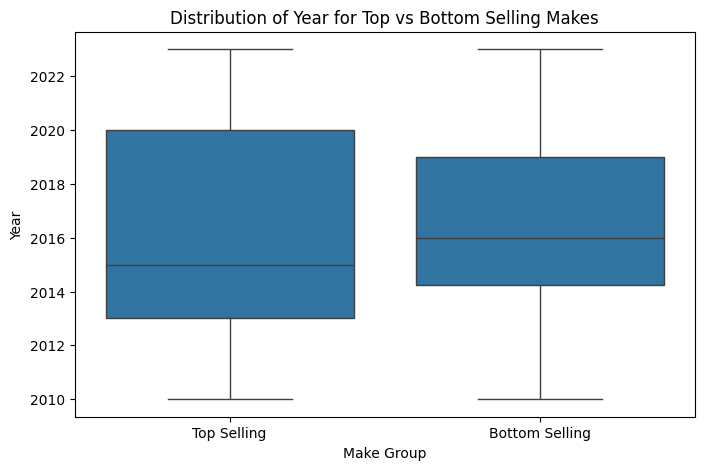

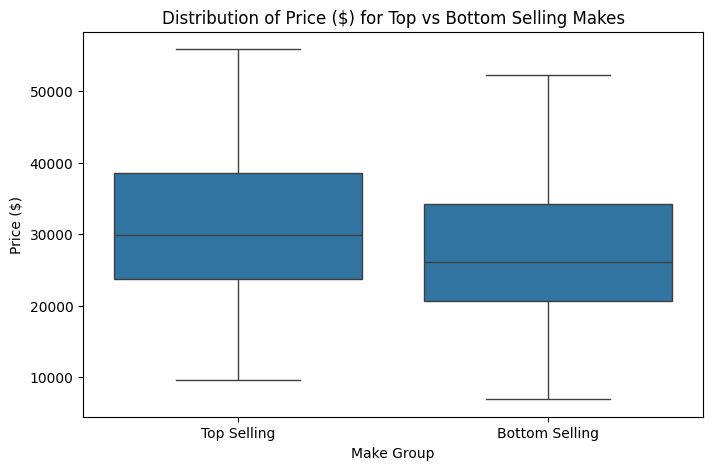

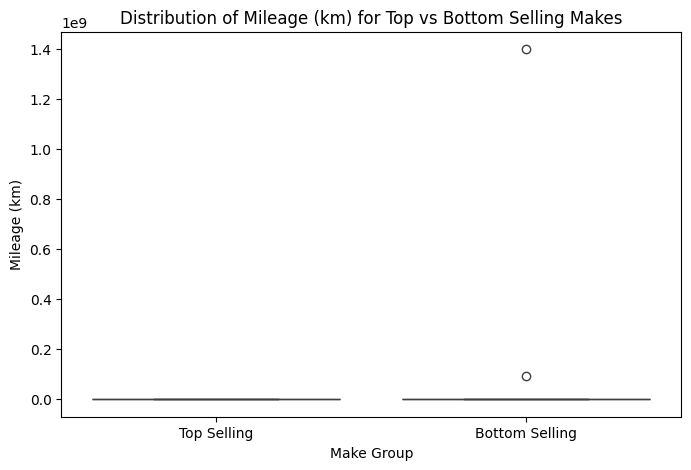

In [51]:
# Combine the two DataFrames and add a 'Make_Group' column
top_makes_df['Make_Group'] = 'Top Selling'
bottom_makes_df['Make_Group'] = 'Bottom Selling'

combined_makes_df = pd.concat([top_makes_df, bottom_makes_df])

# List of numerical features to compare
numerical_features = ['Year', 'Price ($)', 'Mileage (km)']

# Generate box plots for each numerical feature comparing the two groups
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Make_Group', y=feature, data=combined_makes_df)
    plt.title(f'Distribution of {feature} for Top vs Bottom Selling Makes')
    plt.xlabel('Make Group')
    plt.ylabel(feature)
    plt.show()

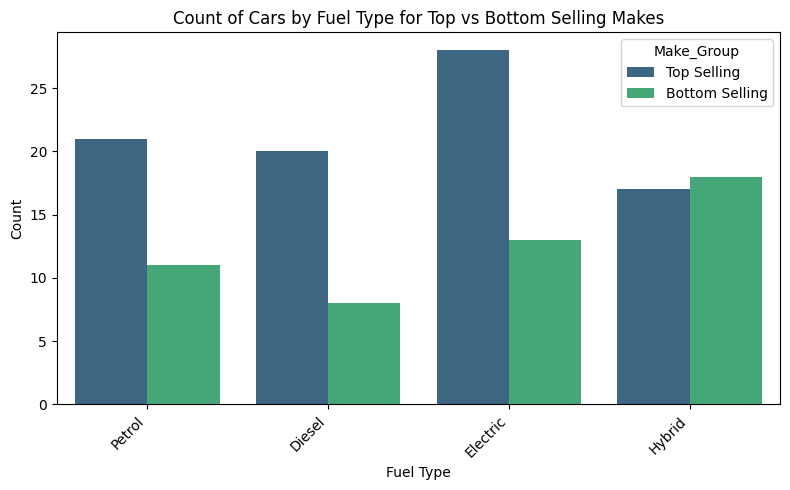

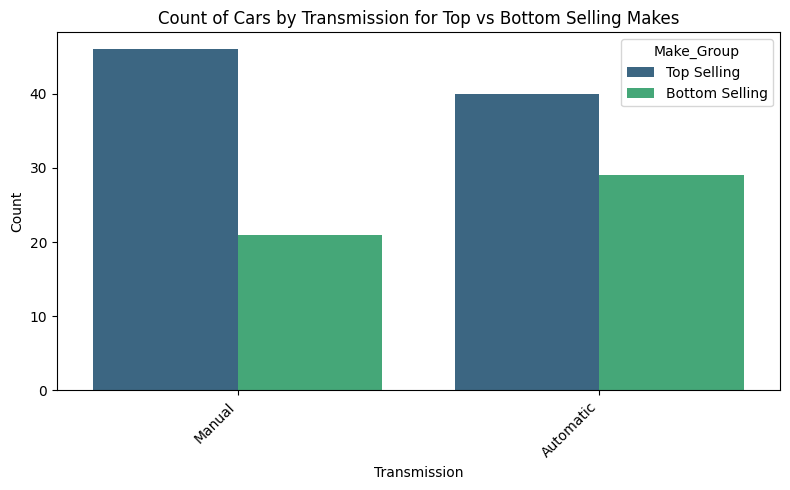

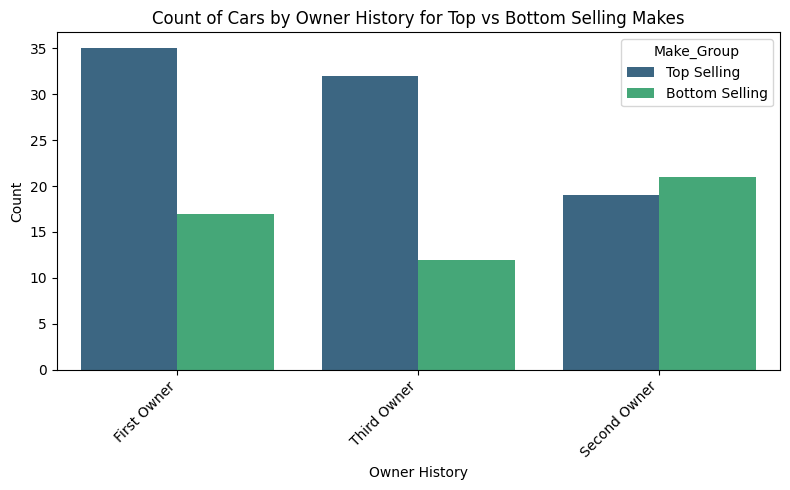

In [52]:
# List of categorical features to compare
categorical_features = ['Fuel Type', 'Transmission', 'Owner History']
make_group_col = 'Make_Group' # Column indicating Top/Bottom Selling Make Group
target_col = 'Sold (Yes/No)' # Still relevant for potential future analysis, but not directly used in these count plots

# Generate count plots for each categorical feature comparing the two groups
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue=make_group_col, data=combined_makes_df, palette='viridis')
    plt.title(f'Count of Cars by {feature} for Top vs Bottom Selling Makes')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()